# SIT742: Modern Data Science 
**(Assessment Task 02: Bank Marketing Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

**Project Group Information:**

- Names: Rajesh Kallumari, Sai Midhil Chowdary Kari, Jay Vimalbhai Trivedi
- Student IDs: 218721162, 219054636, 218449725
- Emails: rkallumari@deakin.edu.au, skari@deakin.edu.au, jtrivedi@deakin.edu.au

---

# 1.Import Spark

In [1]:
# Install wget module to download files from internet
!pip install wget

# Install jdk as Spark is written in Java and requires Java to run
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download spark as a zipped folder from spark official site
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
  
# Unzip the zipped folder downloaded to get the installable files
!tar xf spark-2.4.0-bin-hadoop2.7.tgz

# Install spark
!pip install -q findspark

# Add Java and Spark Environment Variables for running spark commands
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"

  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
# Initialise spark session which removes the overhead of initialising spark context and can directly provide sql context as well without separate initializations
import findspark
findspark.init()
from pyspark.sql import SparkSession 

# 2.Read and check data

In [0]:
# Download the dataset containing the bank campaign details from github
import wget
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2019/data/bank.csv'
DataSet = wget.download(link_to_data)

In [4]:
# Checking if the bank dataset is downloaded and also we ca see the Spaark installable folders available
!ls

bank.csv  sample_data  spark-2.4.0-bin-hadoop2.7  spark-2.4.0-bin-hadoop2.7.tgz


In [0]:
# Create a seaparate instance of Spark session with the application name as ml-bank which we will using all through the notebook
spark = SparkSession.builder.appName('ml-bank').getOrCreate()

# Read the bank detaset downoaded into a spark datarame 'df'
df = spark.read.csv('bank.csv', header = True, inferSchema = True) 

In [6]:
# QUESTION

# Check data distribution
# You may use printSchema() 

# SOLUTION

# ANALYSING THE DATA DISTRIBUTION

# Using printSchema() to see the columns, its data types and if its nullable or not 
print("###########  Different columns, its datatypes and constraints on it #################")
df.printSchema() 

# Separating next analysis section
print('')
print ('-' * 80)
print('')

# Using show() to show first 5 rows to get the essence of the dataframe
print("#############  First five rows of the dataframe #############")
df.show(5)

# Separating next analysis section
print('')
print ('-' * 80)
print('')

# Using describe on the numerical columns to check the data distribution by fetching the mean, standard Diviation, minimum, maximum and total count of each column
print("#############  Distribution of data in the numerical categories #############")
dTypes = df.dtypes
for col, type in dTypes:
  if type == 'int':
    df.describe(col).show()

# Separating next analysis section
print('')
print ('-' * 80)
print('')

# Using distinct on the categorical columns to check different categories present in each categorical columns
print("#############  Understanding the distinct categories in the categorical column #############")
for col, type in dTypes:
  if type == 'string':
    print("For the column " + col + " we have " + str(df.select(col).distinct().count()) + " categories and they are:")
    df.select(col).distinct().show()

# Separating next analysis section
print('')
print ('-' * 80)
print('')

# Using crossTab to see the relation between different columns with deposit column
print("#############  Understanding the behavior of deposit with reespect to other columns #############")
for col in df.columns:
  df.crosstab(col, 'deposit').show()
  

###########  Different columns, its datatypes and constraints on it #################
root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- deposit: string (nullable = true)


--------------------------------------------------------------------------------

#############  First five rows of the dataframe #############
+---+----------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+-

# **Observations:**



*   All the columns are nullable and so we need to remove rows that might contain null values.
*   There is a value 'unknown' in many of the categorical columns which must be removed.

*   The variation of data among the numerical columns is way too high with balance column having values ranging in 1500 and columns like previous having data within a value of 2 and so normalisation is required for proper data visualisation.
*   There are no columns with long sentences containing unwanted words like 'a', 'the' and also there are no columns that needs some kind of inference which removes the need of tokenising to extract more important words.








# 3.Select features

In [7]:
# QUESTION

# Select features ('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit') as df2

# SOLUTION

# Selecting the necessary columns for the further learning process and taking the output to a new dataframe df2
df2 = df.select('age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit')

# Dropping the rows that doesn't have valid data for any of the columns. Giving the value of attribute 'how' as 'any' to make sure the row is dropped if any of its column has a null value
df2 = df2.dropna(how ='any')

# Displaying the first 5 rows of the dataframe
df2.show(5)

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 59|    admin.|married|secondary|     no|   2343|    yes|  no|       1|   -1|       0| unknown|    yes|
| 56|    admin.|married|secondary|     no|     45|     no|  no|       1|   -1|       0| unknown|    yes|
| 41|technician|married|secondary|     no|   1270|    yes|  no|       1|   -1|       0| unknown|    yes|
| 55|  services|married|secondary|     no|   2476|    yes|  no|       1|   -1|       0| unknown|    yes|
| 54|    admin.|married| tertiary|     no|    184|     no|  no|       2|   -1|       0| unknown|    yes|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
only showing top 5 rows



In [8]:
# QUESTION

# Remove invalid rows/records using spark.sql 

# SOLUTION

# Displaying the count of the rows before removing the invalid data
print("Number of rows before cleaning data : " + str(df2.count()))

# Register the table with the table name as bank to run the sql queries
df2.registerTempTable("bank");

# Querying out the fields which don't hold null value and also for non-numeric columns removing rows that has value 'unknown'
# Also making sure only the rows with poutcome values failure and success are extracted

df2 = spark.sql("""
      Select * FROM bank where NOT 
      (age IS NULL OR 
       job IS NULL OR job = 'unknown' OR
       marital IS NULL OR marital = 'unknown' OR
       education IS NULL OR education = 'unknown' OR
       default IS NULL OR default = 'unknown' OR
       balance IS NULL OR
       housing IS NULL OR housing = 'unknown' OR
       loan IS NULL OR loan = 'unknown' OR
       campaign IS NULL OR
       pdays IS NULL OR
       previous IS NULL OR
       poutcome IS NULL OR poutcome = 'unknown' OR
       deposit IS NULL OR deposit = 'unknown') AND poutcome IN ('failure','success')
       """);

# Displaying the count of the rows after removing the invalid data
print("Number of rows after cleaning data : " + str(df2.count()))

# Displaying the first five rows of resultant table with cleaned data
print("First 5 rows of dataframe df2 after cleaning of data :")

print('')

df2.show(5);

Number of rows before cleaning data : 11162
Number of rows after cleaning data : 2181
First 5 rows of dataframe df2 after cleaning of data :

+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
|age|       job|marital|education|default|balance|housing|loan|campaign|pdays|previous|poutcome|deposit|
+---+----------+-------+---------+-------+-------+-------+----+--------+-----+--------+--------+-------+
| 33|  services|married|secondary|     no|   3444|    yes|  no|       1|   91|       4| failure|    yes|
| 56|technician|married|secondary|     no|    589|    yes|  no|       1|  147|       2| success|    yes|
| 34|    admin.|married| tertiary|     no|    899|    yes|  no|       1|  170|       3| failure|    yes|
| 53|   retired|married| tertiary|     no|   2269|     no|  no|       2|  150|       1| success|    yes|
| 37|technician|married|secondary|     no|   5115|    yes|  no|       2|  171|       4| failure|    yes|
+---+----------+--

In [9]:
# QUESTION

# Convert categorical features to metric features using One hot encoding

# SOLUTION

#Importing the One hot encoder estimator, string indexer and pipeline
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer
from pyspark.ml import Pipeline

# Function which peforms one hot encoding on the given categorical metrics and updates dataframe with the sparse vectors for respective categorical metrics
def doOneHotEncoding(dataFrame, categoricalColumns):
  """
    Converts the categorical columns to sparse vectors using One Hot Encoding
    dataframe: the dataframe on which the OHE needs to be performed
    columns_to_be_vec: List of categorical columns in the given dataframe
    
  """ 
  
  # Intialise the list to store stages for the pipeline
  stagesList = []
  
  # Iterating towards categorical columns to add string indexer and one hot encoder stages for each column
  for col in categoricalColumns:
    
    # Creating a string indexer stage which will index each category in the categorical columns
    stringIndexer = StringIndexer(inputCol = col, outputCol = col + "_index")
    
    # Creating a one hot encoder stage which converts the indexed categorical columns to vectorised columns
    oneHotEncoder = OneHotEncoderEstimator(inputCols = [stringIndexer.getOutputCol()], outputCols = [col + "_vec"])
    
    # Adding both the stages to the stagesList
    stagesList.append(stringIndexer)
    stagesList.append(oneHotEncoder)
  
  # Creating a pipeline with above created stages
  pipelineIndexers = Pipeline(stages = stagesList)
  
  # Executing the pipeline which executes a string indexer and onehotencoder on each categorical column
  dataFrame = pipelineIndexers.fit(dataFrame).transform(dataFrame)
  
  # Returning the dataframe that has been updated with the indexed and vectorised columns of every categorical column
  return dataFrame

# Listing the categorical columns
categoricalColumns = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

# Output columns that will be derived after OHE. Initialised to be used to pick and display only these columns from OHE output
oheOutputColumns = [x + "_vec" for x in categoricalColumns] 

# Performing OHE on categorical features of df2
df2 = doOneHotEncoding(df2, categoricalColumns)


# Displaying indices assigned to each category in the categorical columns by the string indexer
print("Index assigned for each category of categorical columns by the string indexer: ")

# Iterating towards the categorical columns
for col in categoricalColumns:
  
  # Displaying the index assigned for each category in the indexed categorical columns
  df2.select(col,col + '_index').distinct().show()

# Separating next analysis section
print('')
print ('-' * 80)
print('')

# Displaying only the top five rows of the OHE resultant categorical columns that are converted to sparse vectors
print("First 5 rows of the vectorised categorical fetaures which is the output of the OHE")
df2.select(oheOutputColumns).show(5)



Index assigned for each category of categorical columns by the string indexer: 
+-------------+---------+
|          job|job_index|
+-------------+---------+
| entrepreneur|      9.0|
|self-employed|      8.0|
|  blue-collar|      3.0|
|       admin.|      2.0|
|      student|      6.0|
|   management|      0.0|
|     services|      5.0|
|      retired|      4.0|
|    housemaid|     10.0|
|   unemployed|      7.0|
|   technician|      1.0|
+-------------+---------+

+--------+-------------+
| marital|marital_index|
+--------+-------------+
| married|          0.0|
|divorced|          2.0|
|  single|          1.0|
+--------+-------------+

+---------+---------------+
|education|education_index|
+---------+---------------+
|secondary|            0.0|
| tertiary|            1.0|
|  primary|            2.0|
+---------+---------------+

+-------+-------------+
|default|default_index|
+-------+-------------+
|     no|          0.0|
|    yes|          1.0|
+-------+-------------+

+-------+--

# Observations


*   Categorical columns are first indexed using string indexer that gives indexes based on amount of repetition.
*   The indexed categorical columns are given to One Hot Encoding to obtain the vectorised categorical columns.
*   The OHE output length is less by one when compared to categories present in categorical columns which is because the zero indexed categories are not counted during the sparse vector creation in OHE.





## 3.1 normalisation

In [10]:
# QUESTION

# Apply Min-Max normalisation on each attribute using MinMaxScaler  


# SOLUTION

# Importing Vector assembler and min max scaler 
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler

# Initialising a list of numerical columns in df2
numericalColumns = ['age','balance','campaign','pdays','previous']

# We try to assemble all the feature columns 
# We go for vectorised categorical features which is output of OHE and numerical columns
assembleColumns = [col + "_vec" for col in categoricalColumns] + numericalColumns

# Using vector assembler to combine all the features into a single vectorised features column
assembler = VectorAssembler(inputCols = assembleColumns, outputCol = "features_assembled")

# Applying the vector assembler model on the dataframe which converts the numerical columns to vectors and combines all the input columns to a single assembled vector column
df2 = assembler.transform(df2)

# Normalise the features to get values between 0 and 1 using Min max normalisation

# Create the instance of the Min max scaler giving the vector assembled features column as input and name the output column as features
minMaxScaler = MinMaxScaler(inputCol = "features_assembled", outputCol = "features")

# Construct the Min max model by applying the fit on the dataframe df2
model= minMaxScaler.fit(df2)

# Apply the model on the dataframe to get the normalised vector column features updated in the df2
df2 = model.transform(df2)

# Showing top 5 rows by selecting the label i.e., deposit column, features_assembled obtained by vector assembler and the features column obtained after min-max normalization
print("First 5 rows of dataframe df2 with deposit(label) and normalised features column :")
df2.select('deposit','features_assembled','features').show(5)


First 5 rows of dataframe df2 with deposit(label) and normalised features column :
+-------+--------------------+--------------------+
|deposit|  features_assembled|            features|
+-------+--------------------+--------------------+
|    yes|(23,[5,10,12,14,1...|[0.0,0.0,0.0,0.0,...|
|    yes|(23,[1,10,12,14,1...|[0.0,1.0,0.0,0.0,...|
|    yes|(23,[2,10,13,14,1...|[0.0,0.0,1.0,0.0,...|
|    yes|(23,[4,10,13,14,1...|[0.0,0.0,0.0,0.0,...|
|    yes|(23,[1,10,12,14,1...|[0.0,1.0,0.0,0.0,...|
+-------+--------------------+--------------------+
only showing top 5 rows



# 4.Unsupervised learning

## 4.1 K-means

In [11]:
# QUESTION

# Perform unsupervised learning on df2 with k-means 
# You can use whole df2 as both training and testing data, 
# Evaluate the clustering result using Accuracy.  


# SOLUTION

# Importing the Kmeans and the necesscary evaluators
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
from pyspark.sql.types import DoubleType
from pyspark.sql.types import StringType
import math


# Indexing the deposit column to form the label column for evaluations

# Forming instance of string indexer with deposit column as inout and the indexed output to be named a features
indexer = StringIndexer(inputCol = "deposit", outputCol = "label")

# Creating the string indexr model and applying it on df2 to update df2 with indexed deposit column which will act as label column going forward
df2 = indexer.fit(df2).transform(df2)

# Performing KMeans on the df2 with k=2 for getting two clusters as our target column deposit is also divided to two classifications

# Creating an instance of the KMeans with number of clusters as 2 and seed value 1.
kmeans = KMeans(k = 2, seed = 1)

# Constructing KMeans model by giving the features columns as input
model = kmeans.fit(df2.select('features'))

# Applying the model on the df2 to obtain a new column predictions updated to df2 with the cluster infromation.
prediction = model.transform(df2)

# Displaying the deposit, indexed_deposit, label, features and predictions formed by KMeans
prediction.select('deposit', 'label', 'features', 'prediction').show()

print("The WSSE and silhouette, accuracy and ROC scores for two clusters :")

# Displaying the two centroids chosen for clustering by KMeans
print("The centroids as chosen by the KMeans for the clustering")

# Obtaining the centroid infromation from the KMeans model
centers = model.clusterCenters()

# Iterating through the centroids list to display them 
for center in centers:
    print(center)

# Separating next analysis section
print('')
print ('-' * 80)
print('')

# Displaying the WSSSE of the KMeans model with two clusters
print("Within Set Sum of Squared Error WSSSE for the model with two clusters : " + str(math.sqrt(model.computeCost(df2.select('features')))))

# Evaluating the predictions/clusters formed by KMeans using ClusterEvaluator with 'silhouette' as the metric
# Creating the instance of the clustering evaluator
evaluator = ClusteringEvaluator()

# Applying the evaluator on the predictions made by the KMeans (which denotes the clusters made by KMeans)
result = evaluator.evaluate(prediction)

# Displaying the Accuracy score obtained by applying clustering evaluator
print('Silhouette score as calculated by Clustering evaluator: '+ str(result))

# Evaluating using multiClassClassificationEvaluator using deposit as the label and metric as 'accuracy'
# Creating the instance of the Multi class classification evaluator
classEvaluator = MulticlassClassificationEvaluator(metricName = 'accuracy')

# Casting the prediction column as double as double value is expected in multiClassClassificationEvaluator
prediction_casted = prediction.withColumn("prediction",prediction['prediction'].cast(DoubleType()))

# Using the instance of the multi class classification evaluator, evaluating the predictions derived by KMeans
result = classEvaluator.evaluate(prediction_casted)

# Displaying the accuracy score as calculated by the KMeans evaluator
print('Accuracy Score as calculated by Multi class Classification Evaluator: '+ str(result))

# Evaluating using BinaryClassificationEvaluator with 'areaUnderROC' as the metric
binaryEvaluator = BinaryClassificationEvaluator(rawPredictionCol = "prediction")

# Applying the binary evaluator on the predictions obtained by the KMeans
result = binaryEvaluator.evaluate(prediction_casted)

# Displaying te Area under ROC as calculated by Binary classification evaluator
print('Area under ROC as calculated by Binary classification evaluator: '+ str(result))

# Separating next analysis section
print('')
print ('-' * 80)
print('')


# Analysing the silhouette scores when number of clusters are increased in KMeans
print("The WSSE and silhouette scores as the number of clusters increases :")
for i in range(3,10):
  kmeans = KMeans(k = i, seed = 1)
  kmeans_model = kmeans.fit(df2.select('features'))
  prediction_analysis = kmeans_model.transform(df2)
  evaluator = ClusteringEvaluator()
  result = evaluator.evaluate(prediction_analysis)
  print("Within Set Sum of Squared Error WSSSE for the model with "+ str(i) +" clusters : " + str(math.sqrt(kmeans_model.computeCost(df2.select('features')))))
  print("Silhouette score as calculated by Clustering evaluator for "+ str(i) +" clusters : "+ str(result))

+-------+-----+--------------------+----------+
|deposit|label|            features|prediction|
+-------+-----+--------------------+----------+
|    yes|  0.0|[0.0,0.0,0.0,0.0,...|         1|
|    yes|  0.0|[0.0,1.0,0.0,0.0,...|         1|
|    yes|  0.0|[0.0,0.0,1.0,0.0,...|         0|
|    yes|  0.0|[0.0,0.0,0.0,0.0,...|         0|
|    yes|  0.0|[0.0,1.0,0.0,0.0,...|         1|
|    yes|  0.0|[0.0,0.0,0.0,0.0,...|         1|
|    yes|  0.0|[0.0,0.0,0.0,0.0,...|         1|
|    yes|  0.0|[1.0,0.0,0.0,0.0,...|         0|
|    yes|  0.0|[0.0,1.0,0.0,0.0,...|         0|
|    yes|  0.0|[0.0,0.0,0.0,1.0,...|         1|
|    yes|  0.0|[0.0,1.0,0.0,0.0,...|         0|
|    yes|  0.0|[0.0,0.0,0.0,0.0,...|         0|
|    yes|  0.0|[0.0,0.0,0.0,0.0,...|         1|
|    yes|  0.0|[0.0,0.0,0.0,0.0,...|         1|
|    yes|  0.0|[0.0,0.0,0.0,1.0,...|         1|
|    yes|  0.0|[0.0,1.0,0.0,0.0,...|         1|
|    yes|  0.0|[1.0,0.0,0.0,0.0,...|         0|
|    yes|  0.0|[1.0,0.0,0.0,0.0,...|    

# Observations


*   We have divided the data set to two clusters using KMeans.
*   Evaluated the clusters with label as deposit to arrive at an accuracy score of 0.52 .
*   The silhouette score is reducing as the clusters increase. So two clusters is comparatively good choice as it has better silhouette score.
*   Also, the WSSE value is decreasing as the number of clusters increase. However, the score at two clusters that amounts to 0.52 is quite comparable with the larger number of clusters. 
*   The plot for clusters is not possible currentlty as there are too many features to visualise. So we will plot after reducing the dimensionlaity using PCA.





## 4.2 PCA

+-------+--------------------+--------------------+--------------------+
|deposit|            features|  features_assembled|         pcaFeatures|
+-------+--------------------+--------------------+--------------------+
|    yes|[0.0,0.0,0.0,0.0,...|(23,[5,10,12,14,1...|[0.96364248505160...|
|    yes|[0.0,1.0,0.0,0.0,...|(23,[1,10,12,14,1...|[0.83734101836268...|
|    yes|[0.0,0.0,1.0,0.0,...|(23,[2,10,13,14,1...|[-0.1084500265257...|
|    yes|[0.0,0.0,0.0,0.0,...|(23,[4,10,13,14,1...|[-0.4795609426700...|
|    yes|[0.0,1.0,0.0,0.0,...|(23,[1,10,12,14,1...|[0.95767948650617...|
+-------+--------------------+--------------------+--------------------+
only showing top 5 rows

Variance Ratio of the PCA model: [0.24018136313534538,0.17260418775538186]

--------------------------------------------------------------------------------

Variance Ratio of the PCA model with 3 dimensions : [0.24018136313534538,0.17260418775538186,0.13795516886908601]
Variance Ratio of the PCA model with 4 dimensi

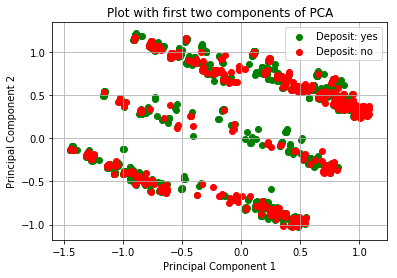

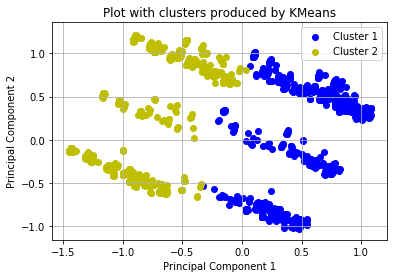

In [12]:

# QUESTION

# Generate a scatter plot using the first two PCA components to investigate the data distribution.

# SOLUTION

# Importing the PCA and pyplot
from pyspark.ml.feature import PCA
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf

# Perform Principal Component Analysis for forming PCA components
# Initialise an instance of PCA with input as the normalised features and output as the pcaFeatures and with k as 2 to reduce features to two dimensinal
pca = PCA(k = 2, inputCol = "features", outputCol = "pcaFeatures")

# Creating the PCA model by applying the PCA instance on df2
model = pca.fit(df2)

# Obtaining the PCA components by applying the PCA model on df2
result = model.transform(df2)

# Showing first rows with the deposit(label), features, features_assembled and pcaFeatures
result.select('deposit','features','features_assembled','pcaFeatures').show(5)

# Displaying variance in the PCA model formed
print("Variance Ratio of the PCA model: "+ str(model.explainedVariance))

# Plotting a scatter plot for first two PCA components by segregating with deposit yes/no

# Taking out PCA components for deposit 'yes'
pcaFeaturesForYes = result.select("pcaFeatures").where(result.deposit == 'yes').collect()

# Taking out PCA components for deposit 'no'
pcaFeaturesForNo = result.select("pcaFeatures").where(result.deposit == 'no').collect()

#Initialising the x and y variables for the scatter plot
x1 = []
y1 = []
x2 = []
y2 = []

# Populating the x and y coordinates for successful deposit PCA components

# Iterating through every row in pcaFeatures column segregated for successful deposists
for row in pcaFeaturesForYes:
  
  # Taking out the PCA components as an array
  result_array = row['pcaFeatures'].toArray()
  
  # Adding the first PCA components to x
  x1.append(result_array[0])
  
  # Adding the second PCA components to y
  y1.append(result_array[1])

# Populating the x and y coordinates for unsuccessful deposit PCA components

# Iterating through every row in pcaFeatures column segregated for unsuccessful deposists
for row in pcaFeaturesForNo:
  
  # Taking out the PCA components as an array
  result_array = row['pcaFeatures'].toArray()
  
  # Adding the first PCA components to x
  x2.append(result_array[0])
  
  # Adding the second PCA components to y
  y2.append(result_array[1])

# Plotting the scatter plot using MatPlotLib

# Initialising the pyplot
fig, ax = plt.subplots()

# Giving green color for deposit value 'yes'
ax.scatter(x1, y1, color = 'g')

# Giving green color for deposit value 'no'
ax.scatter(x2, y2, color = 'r')

# Defining the x and y labels to be shown in the plot
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# Assigning the legends for green and red dots of the plot
ax.legend(['Deposit: yes','Deposit: no'])

ax.set_title('Plot with first two components of PCA')

# Drawing the plot
ax.grid()

# Plotting the two clusters formed by KMeans on the PCA components to visualise the clusters

# Performing the KMeans to get the predictions to plot
kmeans = KMeans(k = 2, seed = 1)
prediction = kmeans.fit(result.select('features')).transform(result)

# Taking out PCA components for cluster 1 in the predictions
pcaFeaturesForYes = prediction.select("pcaFeatures").where(prediction.prediction == 1).collect()

# Taking out PCA components for cluster 2 in the predictons
pcaFeaturesForNo = prediction.select("pcaFeatures").where(prediction.prediction == 0).collect()

# Initialising the x and y variables for the scatter plot
x1 = []
y1 = []
x2 = []
y2 = []

# Populating the x and y coordinates for cluster 1 PCA components
for row in pcaFeaturesForYes:
  
  # Taking out the PCA components as an array
  result_array = row['pcaFeatures'].toArray()
  
  # Adding the first PCA components to x
  x1.append(result_array[0])
  
  # Adding the second PCA components to y
  y1.append(result_array[1])

# Populating the x and y coordinates for unsuccessful deposit PCA components
for row in pcaFeaturesForNo:
  
  # Taking out the PCA components as an array
  result_array = row['pcaFeatures'].toArray()
  
  # Adding the first PCA components to x
  x2.append(result_array[0])
  
  # Adding the second PCA components to y
  y2.append(result_array[1])

  
# Plotting the scatter plot using MatPlotLib

# Initialising the pyplot
fig, ax = plt.subplots()

# Giving green color for cluster 1
ax.scatter(x1, y1, color = 'b')

# Giving green color for cluster 2
ax.scatter(x2, y2, color = 'y')

# Defining the x and y labels to be shown in the plot
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Plot with clusters produced by KMeans')

# Assigning the legends for green and red doys of the plot
ax.legend(['Cluster 1','Cluster 2'])

# Drawing the plot
ax.grid()

# Separating next analysis section
print('')
print ('-' * 80)
print('')


# Analysing the variance by increasing the dimesionality
for i in range(3,10):
  pcaInitialising = PCA(k = i, inputCol = "features", outputCol = "pcaFeatures")
  pcaModel = pcaInitialising.fit(df2) 
  print("Variance Ratio of the PCA model with " + str(i) + " dimensions : " + str(pcaModel.explainedVariance))

# Observations


*   The PCA reduced the 23 dimension features to 2 dimensional.
*   The variance score from the original features is about 0.24 and 0.173 for the two PCA components. The variance is reasonable less.
*   The clusters formed by KMeans is visualised using the PCA components and clear differentiation in the clusters is visible in the scatter plot.





# 5.Supervised learning

In [13]:
# Dividing the df2 data as 70% training and 30% testing data
train, test = df2.randomSplit([0.7, 0.3], seed = 742)

# Printing the training and test data count taken out from the df2
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))


Training Dataset Count: 1535
Test Dataset Count: 646


## 5.1 LogisticRegression

Coefficients: [0.08309589128005467,0.32757334062461385,0.0096105141436745,0.38190941125150324,-0.39774944792469447,-0.22315221504037752,-1.0115944989211938,-0.6673825968709629,-0.06422556314687217,-0.04052176974477358,-0.02874554906578332,-0.1028090951688996,-0.010202304164208824,-0.29307701174854,-0.26309379068036487,-0.7754311127062343,-0.5864069648855801,2.050485245963458,0.2604392385346028,-4.06600492148482,1.9019832166550692,-0.5628888207448501,-1.400697868170869]
Intercept: -0.8480313388202999
+-------+--------------------+--------------------+--------------------+----------+
|deposit|            features|       rawPrediction|         probability|prediction|
+-------+--------------------+--------------------+--------------------+----------+
|    yes|[0.0,0.0,0.0,0.0,...|[3.72460351389435...|[0.97644553361903...|       0.0|
|     no|[0.0,0.0,0.0,0.0,...|[1.12520322411170...|[0.75495258510944...|       0.0|
|     no|[0.0,0.0,0.0,1.0,...|[1.92333675311784...|[0.87251006317541...|   

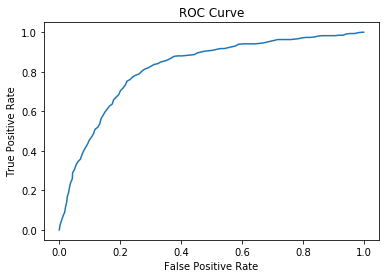

Training set Area under ROC: 0.8181597573306368


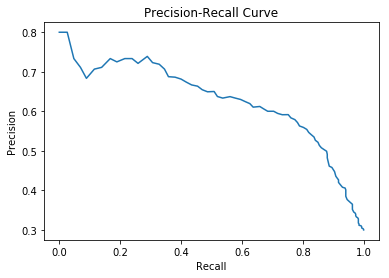

Accuracy Score as calculated by multi class classifictaion evaluator: 0.7492260061919505
Testing set Area under ROC as calculated by ninary classification evaluator: 0.6825217792959728

--------------------------------------------------------------------------------

Accuracy Score as calculated by multi class classifictaion evaluator for 4 iterations: 0.7492260061919505
Testing set Area under ROC as calculated by ninary classification evaluator for 4 iterations : 0.6825217792959728
Accuracy Score as calculated by multi class classifictaion evaluator for 6 iterations: 0.7492260061919505
Testing set Area under ROC as calculated by ninary classification evaluator for 6 iterations : 0.6825217792959728
Accuracy Score as calculated by multi class classifictaion evaluator for 8 iterations: 0.7492260061919505
Testing set Area under ROC as calculated by ninary classification evaluator for 8 iterations : 0.6825217792959728
Accuracy Score as calculated by multi class classifictaion evaluator for

In [14]:
# QUESTION

# Logistic Regression

# SOLUTION

# Import logistic regression, evaluators and matplotlib
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import matplotlib.pyplot as plt

# Perform logistic regression with features combining all columns of df2 other than deposit and indexed deposit column as feature

# Form an instance of the Logistic Regression with features columns and indexed deposit column as label and maximum iterations as 10
logReg = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)

# Form the logistic regression model by applying the instance on the training data
logRegModel = logReg.fit(train)

# Apply the model on the testing data to obtain the predictions, rawpredictions and probability estimations
predictions = logRegModel.transform(test)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(logRegModel.coefficients))
print("Intercept: " + str(logRegModel.intercept))


# Showing the prediction made using Logistic Regression
predictions.select('deposit','features','rawPrediction','probability','prediction').show()

# Taking out the summary of the logistic regression model
logRegSummary = logRegModel.summary

# Taking out Receiver Operating Characteristic (ROC) dataframe which contains False Positive Rate and True Positive Rate values
roc = logRegSummary.roc.collect()

# Plotting the FPR and TPR values on X and Y axes respectively using matplotlib

# Initialising the variables to hold false positive and true positive values 
fpr_values= []
tpr_values= []

# Extracting and populating the fpr and tpr values 
for row in roc:
  fpr_values.append(row['FPR'])
  tpr_values.append(row['TPR'])


# Providing x and y values to the plot as FPR and TPR values converted to arrays respectively
plt.plot(fpr_values,tpr_values)

# Labelling the x and y axes with FPR and TPR values repectively
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Giving title of the plot as ROC curve
plt.title('ROC Curve')

# Displaying the plot
plt.show()

# Displaying the area under the ROC
print('Training set Area under ROC: ' + str(logRegSummary.areaUnderROC))

# Plotting the recall and precision values on X and Y axes respectively using matplotlib

# Taking out precision-recall (pr) dataframe which contains recall, precision values
pr = logRegSummary.pr.collect()

# Initialising the variables to hold recall and precision values 
recall = []
precision = []

# Extracting and populating the recall and precision values 
for row in pr:
  recall.append(row['recall'])
  precision.append(row['precision'])
  
# Plotting the recall and precision values on X and Y axes respectively using matplotlib

# Providing x and y values to the plot as recall and precision values converted to array respectively
plt.plot(recall,precision)

# Labelling the x and y axes with Precision and Recall values repectively
plt.ylabel('Precision')
plt.xlabel('Recall')

# Giving title of the plot as Precision-Recall curve
plt.title('Precision-Recall Curve')

# Displaying the Precision-Recall plot
plt.show()

# Evaluating using multiClassClassificationEvaluator using deposit as the label and metric as 'accuracy'
classEvaluator = MulticlassClassificationEvaluator(metricName = 'accuracy')
result = classEvaluator.evaluate(predictions)
print('Accuracy Score as calculated by multi class classifictaion evaluator: '+ str(result))


# Evaluating using BinaryClassificationEvaluator with 'areaUnderROC' as the metric
binaryEvaluator = BinaryClassificationEvaluator(rawPredictionCol = "prediction")
result = binaryEvaluator.evaluate(predictions)
print('Testing set Area under ROC as calculated by binary classification evaluator: '+ str(result))

# Separating next analysis section
print('')
print ('-' * 80)
print('')

# Analysing the accuracy by increasing the iterations
for i in range(4, 20, 2):
  logRegInitialised = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter = i)
  predictionsAnalysis = logReg.fit(train).transform(test)
  classEvaluator = MulticlassClassificationEvaluator(metricName = 'accuracy')
  result = classEvaluator.evaluate(predictionsAnalysis)
  print('Accuracy Score as calculated by multi class classifictaion evaluator for ' + str(i) + ' iterations: '+ str(result))
  binaryEvaluator = BinaryClassificationEvaluator(rawPredictionCol = "prediction")
  result = binaryEvaluator.evaluate(predictionsAnalysis)
  print('Testing set Area under ROC as calculated by ninary classification evaluator for ' + str(i) + ' iterations : '+str(result))

# Observation

*   The area under the False Positive rate and the True Positive Rate of the model which tends to be 1 when the coeffcients are perfectly formed is about 0.81 which forms a really good number. 
*   The accuracy score as per the multi class evaluator gives a value of 0.75 which stands out when compared to KMeans.



The coefficients obtained on performing the logistic regression 
[0.08309589128005467,0.32757334062461385,0.0096105141436745,0.38190941125150324,-0.39774944792469447,-0.22315221504037752,-1.0115944989211938,-0.6673825968709629,-0.06422556314687217,-0.04052176974477358,-0.02874554906578332,-0.1028090951688996,-0.010202304164208824,-0.29307701174854,-0.26309379068036487,-0.7754311127062343,-0.5864069648855801,2.050485245963458,0.2604392385346028,-4.06600492148482,1.9019832166550692,-0.5628888207448501,-1.400697868170869]

Plotting the coefficients derived by taking coefficients on Y-Axis


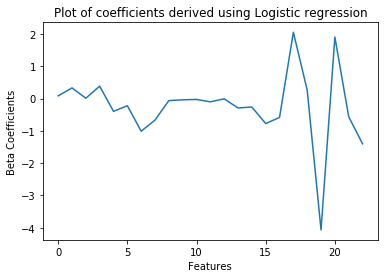

+-------------------+--------------------+
|            feature|         coefficient|
+-------------------+--------------------+
|     job_management|                 0.0|
|     job_technician| 0.08309589128005467|
|         job_admin.| 0.32757334062461385|
|    job_blue-collar|  0.0096105141436745|
|        job_retired| 0.38190941125150324|
|       job_services|-0.39774944792469447|
|        job_student|-0.22315221504037752|
|     job_unemployed| -1.0115944989211938|
|  job_self-employed| -0.6673825968709629|
|   job_entrepreneur|-0.06422556314687217|
|      job_housemaid|-0.04052176974477358|
|    marital_married|                 0.0|
|     marital_single|-0.02874554906578332|
|   marital_divorced| -0.1028090951688996|
|education_secondary|                 0.0|
| education_tertiary|-0.01020230416420...|
|  education_primary|   -0.29307701174854|
|         default_no|                 0.0|
|        default_yes|-0.26309379068036487|
|         housing_no|                 0.0|
|        ho

In [15]:

# QUESTION

# Exam the coefficients

# SOLUTION

# Import the row type from pyspark sql package
from pyspark.sql import Row

# Extracting the logistic regression coefficients
beta = logRegModel.coefficients

# Analysing the coefficients

print("The coefficients obtained on performing the logistic regression ")
print(logRegModel.coefficients)

print('')


print("Plotting the coefficients derived by taking coefficients on Y-Axis")

# Plot the coefficients
plt.plot(beta)

# Label x axis as features
plt.xlabel('Features')

# Label y axis as Beta Coefficients
plt.ylabel('Beta Coefficients')
plt.title('Plot of coefficients derived using Logistic regression')
plt.show()

# Mapping the features to the coefficients

# List of all feature column names
featureCols = categoricalColumns + numericalColumns

# Initialising a tuple to hold the features and the respective coefficients
coefficientTuples = []

# Initialising a variable to zero to increment during looping to fetch coefficients
j=0

# Looping through the categorical columns, assign 0 to first category and assign remaining coefficients to other categories 
for x in categoricalColumns:
  
  # Take out the categorical column names ordered as per the indices.
  categoriesIndexDf = df2.select(x,x+'_index').distinct().orderBy(df2[x+'_index'].asc())
  
  # Take out the category column names from the ordered table
  categoriesColumn = categoriesIndexDf.select(x).collect()
  
  # Initialize a variable to hold the categorical column names ordered as per the indices
  categoriesArray = []
  
  # Iterate towards the ordered categorical columns and add them into a variable
  for row in categoriesColumn:
    categoriesArray.append(row[x])
    
  # Form a tuple collecting on element from the ordered categorical column and another element from the coefficient array
  for i in range(len(categoriesArray)):
    
    # For zero indexed category assign zero coefficient
    if i == 0:
      coefficientTuples.append((x + "_" + categoriesArray[i], 0.0))
      
    # For categories with indices greater than zero assign the coefficients
    else:
      coefficientTuples.append((x + "_" + categoriesArray[i], beta[j].item()))
      j = j+1

# Append the remaining coefficients to the numerical columns
for x in numericalColumns:
  coefficientTuples.append((x, beta[j].item()))
  j = j+1

# Create a dataframe to hold the fetaure and its corresponding coefficient as derived by the logistic regression
coefficientDf = spark.createDataFrame(coefficientTuples)

# Name the columns as features and coeffcients
coefficientDf = coefficientDf.withColumnRenamed("_1", "feature").withColumnRenamed("_2", "coefficient")

# Display all the features and its respective coefficients
coefficientDf.show(32)

# Observations


*   The coefficients formed during the logistic regression are mapped back to the features.
*   Taking the absolute value of the coefficients, we notice that the features like balance, poutcome, campaign, previous and job are playing a major role in deciding on the deposit outcomes.



## 5.2 Decision tree

In [16]:
# QUESTION

# Decision tree

# SOLUTION

# Import the decision tree classifier
from pyspark.ml.classification import DecisionTreeClassifier

# Perform decision tree classification with features and deposit as the label.

#Instantiate the decision tree classifier with features column as indexed deposit column as the label column and maximum depth as 4
decisionTree = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 4)

# Construct a Decision tree model by applying the instance on the training data.
decisionTreeModel = decisionTree.fit(train)

# Apply the model derived on the test data to derive the prediction
prediction = decisionTreeModel.transform(test)

# Showing top 5 rows with deposit, fetaures, raw prrediction, probability and the prediction made using decision tree classification
prediction.select('deposit', 'features', 'rawPrediction', 'probability', 'prediction').show(5)

# Displaying the number of features the model is trained on
print('Number of features model is trained on :')
print(decisionTreeModel.numFeatures)

# Displaying the important features as per the decision tree model
print('Important features as per the decision tree model :')
print(decisionTreeModel.featureImportances)

# Display the tree model as formed by the decision tree model
print('Learned classification tree model as designed by the decision tree model :')
print(decisionTreeModel.toDebugString)

# Evaluating using multiClassClassificationEvaluator using deposit as the label and metric as 'accuracy'
classEvaluator = MulticlassClassificationEvaluator(metricName = 'accuracy')
result = classEvaluator.evaluate(prediction)
print('Accuracy Score as calculated by the multi class classification evaluator: '+str(result))


# Evaluating using BinaryClassificationEvaluator with 'areaUnderROC' as the metric
binaryEvaluator = BinaryClassificationEvaluator(rawPredictionCol = "prediction")
result = binaryEvaluator.evaluate(prediction)
print('Area under ROC as calculated by the binomial classifciation evaluator: '+str(result))

# Separating next analysis section
print('')
print ('-' * 80)
print('')

# Evaluating the scores by increasing the maximum depth in the decision tree model construction 
for i in range(1, 10):
  decisionTree = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = i)
  prediction_analysis = decisionTree.fit(train).transform(test)
  classEvaluator = MulticlassClassificationEvaluator(metricName = 'accuracy')
  result = classEvaluator.evaluate(prediction_analysis)
  print('Accuracy Score as calculated by the multi class classification evaluator for max depth '+ str(i) +' : '+str(result))

+-------+--------------------+-------------+--------------------+----------+
|deposit|            features|rawPrediction|         probability|prediction|
+-------+--------------------+-------------+--------------------+----------+
|    yes|[0.0,0.0,0.0,0.0,...| [337.0,40.0]|[0.89389920424403...|       0.0|
|     no|[0.0,0.0,0.0,0.0,...| [200.0,74.0]|[0.72992700729927...|       0.0|
|     no|[0.0,0.0,0.0,1.0,...| [337.0,40.0]|[0.89389920424403...|       0.0|
|    yes|[1.0,0.0,0.0,0.0,...| [316.0,16.0]|[0.95180722891566...|       0.0|
|    yes|[0.0,0.0,0.0,0.0,...| [316.0,16.0]|[0.95180722891566...|       0.0|
+-------+--------------------+-------------+--------------------+----------+
only showing top 5 rows

Number of features model is trained on :
23
Important features as per the decision tree model :
(23,[3,4,15,16,17,21,22],[0.02717599460813661,0.019479939993092655,0.13875753736352986,0.031081864226384072,0.6305150131473698,0.1268265111450616,0.026163139516425377])
Learned classific

# Observations


*   The important features as given by the decision tree model are campaign, pdays, loan, housing, default, job.
*   Loan is taken as the root node for the tree.
*  As the maximum depth i.e., the number of nodes to be taken is increased we observed that the max depth 4 is giving a better accuracy score.
*   The decision so formed with max depth as 4 has been dispalyed.




## 5.3 NaiveBayes

In [17]:
# QUESTION

#NaiveBayes

# SOLUTION

# Import the naive bayes and evaluator
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Showing the prediction made using naive bayes classification

# Initialising the naivebayes with smoothing value 1
naiveBayes = NaiveBayes(smoothing = 1)

# Create a naive bayes model by giving the training data
model = naiveBayes.fit(train)

# Obtain predictions on the testing data
prediction = model.transform(test)

# Showing the first 5 rows with deposit, features, raw prediction, probability and prediction made using naive bayes classification
prediction.select('deposit', 'features', 'rawPrediction', 'probability', 'prediction').show(5)

# Evaluating using multiClassClassificationEvaluator using deposit as the label and metric as 'accuracy'
classEvaluator = MulticlassClassificationEvaluator(metricName = 'accuracy')
result = classEvaluator.evaluate(prediction)
print('Accuracy Score using Multi class classification evaluator for smoothing 1 : '+str(result))

# Separating next analysis section
print('')
print ('-' * 80)
print('')

# Evaluating the accuracy score by increasing the smoothing value in Naive bayes
for i in range(0,10):
  naiveBayes = NaiveBayes(smoothing = i)
  model = naiveBayes.fit(train)
  prediction_analysis = model.transform(test)
  classEvaluator = MulticlassClassificationEvaluator(metricName = 'accuracy')
  result = classEvaluator.evaluate(prediction_analysis)
  print('Accuracy Score for smoothing ' + str(i) + ' : '+str(result))

+-------+--------------------+--------------------+--------------------+----------+
|deposit|            features|       rawPrediction|         probability|prediction|
+-------+--------------------+--------------------+--------------------+----------+
|    yes|[0.0,0.0,0.0,0.0,...|[-14.498429746989...|[0.96859917236413...|       0.0|
|     no|[0.0,0.0,0.0,0.0,...|[-19.659001598005...|[0.92538759031253...|       0.0|
|     no|[0.0,0.0,0.0,1.0,...|[-18.217018764500...|[0.70432795877306...|       0.0|
|    yes|[1.0,0.0,0.0,0.0,...|[-14.504664451771...|[0.90182506306281...|       0.0|
|    yes|[0.0,0.0,0.0,0.0,...|[-15.847706977369...|[0.96809388308560...|       0.0|
+-------+--------------------+--------------------+--------------------+----------+
only showing top 5 rows

Accuracy Score using Multi class classification evaluator for smoothing 1 : 0.7291021671826625

--------------------------------------------------------------------------------

Accuracy Score for smoothing 0 : 0.729102

# Observations


*   The accuracy score seems to be oncreasing as we increase the smoothing value for the naive bayes initiator.
*   The overall accuracy stands at around 0.72 when we use naive byes

